# TABLE OF CONTENTS:

### - PART 1: CHECK IMBALANCE
### - PART 2: CHECK OUTLIER
### - PART 3: CHECK MISSING VALUES
### - PART 4: CHECK CATEGORICAL COLUMNS 
### - PART 5: EDA
### - PART 6: OBSERVATION AND CONCLUSION

In [1]:
from utils import *
from input import path_to_data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# for 100% jupyter notebook cell width
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# pandas DataFrame column and row display limits
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

%matplotlib inline

**dseb63_application_train.csv**\
Main dataset

In [3]:
application_train = pd.read_csv(os.path.join(path_to_data, 'dseb63_application_train.csv'), index_col=0)

In [4]:
application_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,...,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.796,0.0605,0.08,0.0345,...,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,NaN,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,64140
4,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,8.0,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,NaN,0.714279,0.540654,

In [5]:
print('-'*90)
print(f'The shape of dseb63_application_train.csv is: {application_train.shape}')
print('-'*90)
print(f'Number of duplicate values in application_train: {application_train.shape[0] - application_train.duplicated().shape[0]}')
print('-'*90)

------------------------------------------------------------------------------------------
The shape of dseb63_application_train.csv is: (246009, 122)
------------------------------------------------------------------------------------------


Number of duplicate values in application_train: 0
------------------------------------------------------------------------------------------


# *0. LOOKTHROUGH DATA*

**dseb63_bureau.csv**

In [6]:
bureau = pd.read_csv(os.path.join(path_to_data, 'dseb63_bureau.csv'))

In [7]:
bureau.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
0,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,254629
1,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,254629
2,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,254629
3,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,254629
4,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,254629


In [8]:
bureau.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465325 entries, 0 to 1465324
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_BUREAU            1465325 non-null  int64  
 1   CREDIT_ACTIVE           1465325 non-null  object 
 2   CREDIT_CURRENCY         1465325 non-null  object 
 3   DAYS_CREDIT             1465325 non-null  int64  
 4   CREDIT_DAY_OVERDUE      1465325 non-null  int64  
 5   DAYS_CREDIT_ENDDATE     1376227 non-null  float64
 6   DAYS_ENDDATE_FACT       920652 non-null   float64
 7   AMT_CREDIT_MAX_OVERDUE  516780 non-null   float64
 8   CNT_CREDIT_PROLONG      1465325 non-null  int64  
 9   AMT_CREDIT_SUM          1465322 non-null  float64
 10  AMT_CREDIT_SUM_DEBT     1242231 non-null  float64
 11  AMT_CREDIT_SUM_LIMIT    975655 non-null   float64
 12  AMT_CREDIT_SUM_OVERDUE  1465325 non-null  float64
 13  CREDIT_TYPE             1465325 non-null  object 
 14  DA

In [ ]:
bureau.describe().T

In [9]:
print('-'*90)
print(f'The shape of dseb63_bureau.csv is: {bureau.shape}')
print('-'*90)
print(f'Number of duplicate values in bureau: {bureau.shape[0] - bureau.duplicated().shape[0]}')
print('-'*90)

------------------------------------------------------------------------------------------
The shape of dseb63_bureau.csv is: (1465325, 17)
------------------------------------------------------------------------------------------
Number of duplicate values in bureau: 0
------------------------------------------------------------------------------------------


In [10]:
# MOVE LAST COLUMN TO Oth POSITION
column_to_move = 'SK_ID_CURR'  

# Get a list of column names excluding the column to move
other_columns = [col for col in bureau.columns if col != column_to_move]

# Reorder the columns with the column to move at the beginning
bureau = bureau[[column_to_move] + other_columns]

# Display the updated DataFrame
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,254629,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,254629,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,254629,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,254629,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,254629,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [11]:
print('-'*90)
print(f'The shape of bureau.csv is: {bureau.shape}')
print('-'*90)
print(f'Number of unique SK_ID_BUREAU in bureau.csv are: {len(bureau.SK_ID_BUREAU.unique())}')
print(f'Number of unique SK_ID_CURR in bureau.csv are: {len(bureau.SK_ID_CURR.unique())}')
print(f'Number of overlapping SK_ID_CURR in application_train.csv and bureau.csv are: {len(set(application_train.SK_ID_CURR.unique()).intersection(set(bureau.SK_ID_CURR.unique())))}')
print('-'*90)
print(f'Number of duplicate values in application_train: {bureau.shape[0] - bureau.duplicated().shape[0]}')
print('-'*90)

------------------------------------------------------------------------------------------
The shape of bureau.csv is: (1465325, 17)
------------------------------------------------------------------------------------------
Number of unique SK_ID_BUREAU in bureau.csv are: 1465325
Number of unique SK_ID_CURR in bureau.csv are: 263491
Number of overlapping SK_ID_CURR in application_train.csv and bureau.csv are: 210809
------------------------------------------------------------------------------------------
Number of duplicate values in application_train: 0
------------------------------------------------------------------------------------------


# *1.IMBALANCE*

In [12]:
imbalance_col(bureau)

Imbalance Ratio for column 'CREDIT_ACTIVE': 0.0000
Imbalance Ratio for column 'CREDIT_CURRENCY': 0.0000
Imbalance Ratio for column 'DAYS_CREDIT': None
Imbalance Ratio for column 'CREDIT_DAY_OVERDUE': 0.0000
Imbalance Ratio for column 'DAYS_CREDIT_ENDDATE': 0.9303
Imbalance Ratio for column 'DAYS_ENDDATE_FACT': None
Imbalance Ratio for column 'AMT_CREDIT_MAX_OVERDUE': None
Imbalance Ratio for column 'CNT_CREDIT_PROLONG': 0.0051
Imbalance Ratio for column 'AMT_CREDIT_SUM': None
Imbalance Ratio for column 'AMT_CREDIT_SUM_DEBT': None
Imbalance Ratio for column 'AMT_CREDIT_SUM_LIMIT': None
Imbalance Ratio for column 'AMT_CREDIT_SUM_OVERDUE': None
Imbalance Ratio for column 'CREDIT_TYPE': 0.0000
Imbalance Ratio for column 'DAYS_CREDIT_UPDATE': None
Imbalance Ratio for column 'AMT_ANNUITY': None
------------------------------------------------------------------------------------------
The column with the heaviest imbalance ratio is 'DAYS_CREDIT_ENDDATE' with ratio 0.9303


##### Observations and Conclusions

'DAYS_CREDIT' have None values, which may imply that there is no binary classification task or that the imbalance ratio is undefined for these columns.

Other columns like 'CREDIT_ACTIVE,' 'CREDIT_CURRENCY,' 'DAYS_CREDIT_ENDDATE,' etc., have imbalance ratios of 0.0000, suggesting a significant imbalance in the classes.

# *2. Outlier*

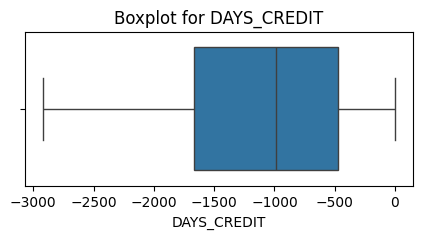

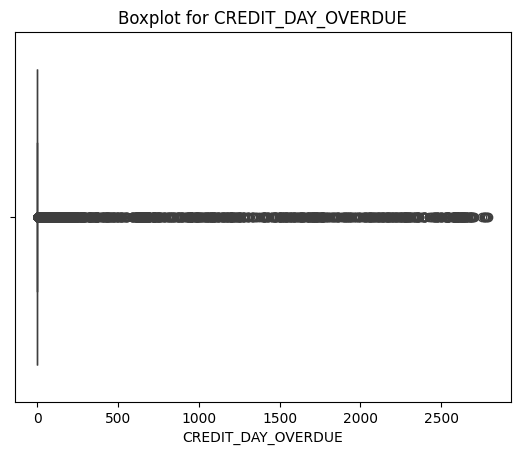

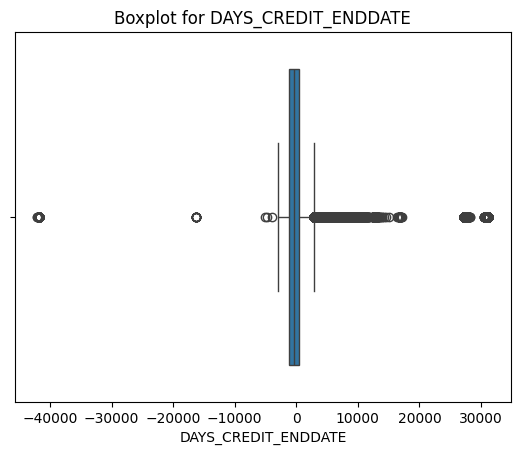

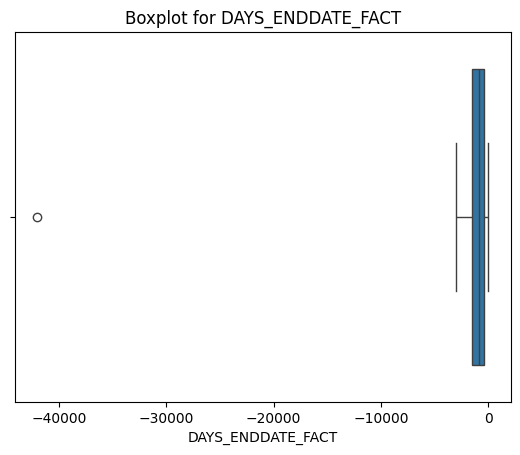

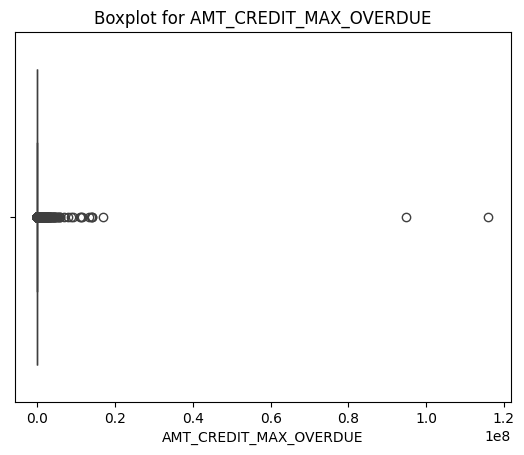

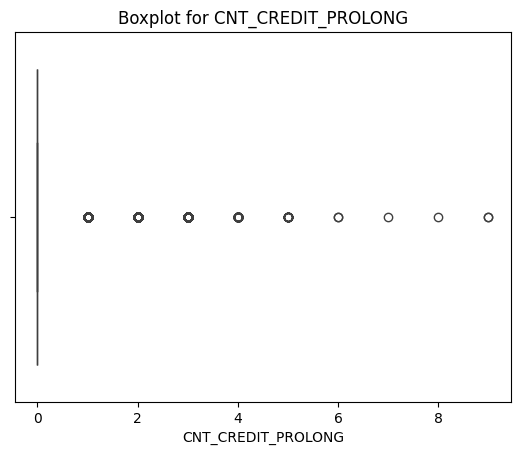

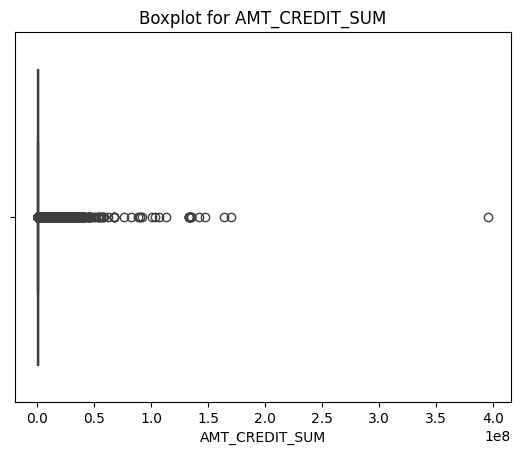

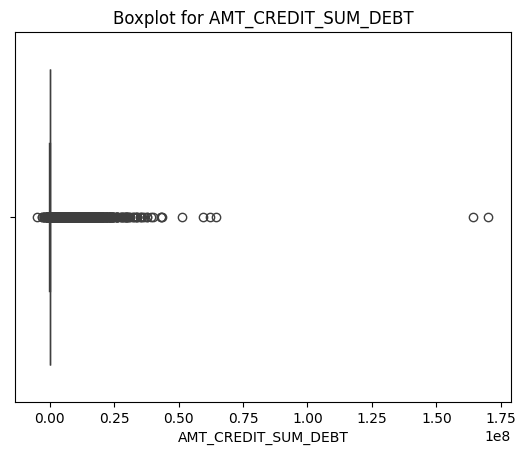

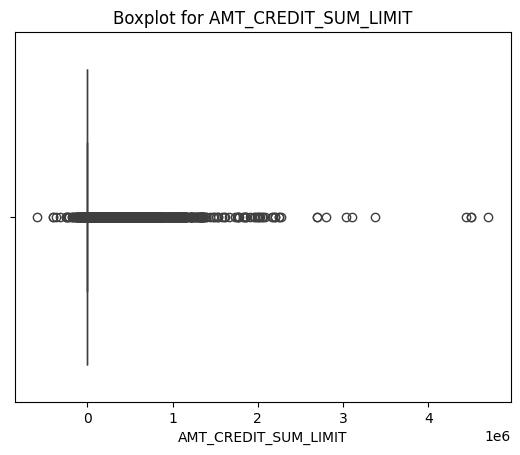

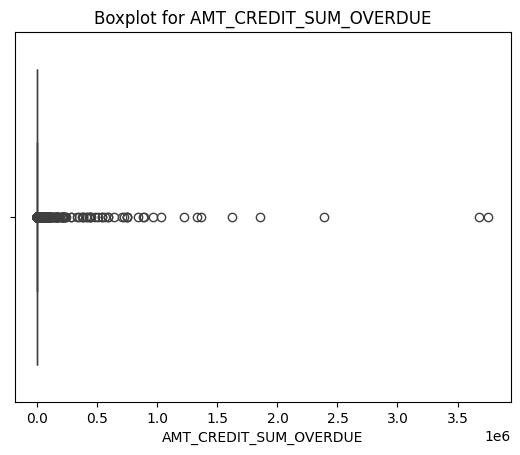

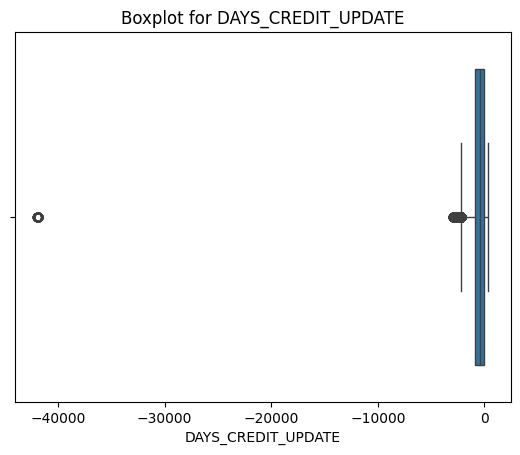

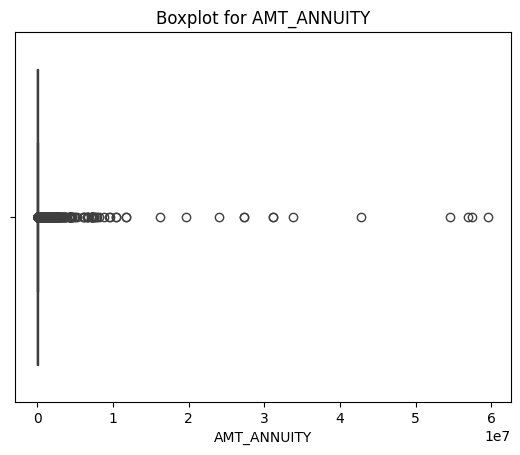

Rows with outliers:
         DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
1               -208                   0               1075.0   
4               -629                   0               1197.0   
5               -273                   0              27460.0   
8              -1734                   0               -638.0   
11             -1896                   0              -1684.0   
...              ...                 ...                  ...   
1465312          -27                   0                399.0   
1465314        -1119                   0                -30.0   
1465316         -420                   0                676.0   
1465322        -1441                   0               2197.0   
1465324        -2724                   0              -2511.0   

         DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  \
1                      NaN                     NaN                   0   
4                      NaN                 77674.5 

In [13]:
outlier(bureau)

##### Observations and Conclusions
- DAYS_CREDIT:
    - This column represents the number of days before the current application when the Bureau credit report was pulled. Outliers here might indicate cases where the credit report was pulled unusually far in advance or with a significant delay.
- CREDIT_DAY_OVERDUE:
    - This column indicates the number of days a client has been overdue on a Bureau credit. Outliers could suggest instances of extreme delays in repaying credit.
- AMT_CREDIT_MAX_OVERDUE:
    - This column signifies the maximum amount of overdue on a credit. Outliers may point to cases where the overdue amount is exceptionally high.
- CNT_CREDIT_PROLONG:
    - This column represents the number of times the credit was prolonged. Unusually high values might indicate instances where the credit terms were extended multiple times.
- AMT_CREDIT_SUM, AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_LIMIT, AMT_CREDIT_SUM_OVERDUE:
    - These columns involve various aspects of the credit amount. Outliers could highlight cases with extremely high or low credit amounts, debts, limits, or overdue amounts.
- DAYS_CREDIT_UPDATE:
    - This column denotes the number of days since the last information update on the credit record. Outliers might suggest cases where the information was updated unusually frequently or infrequently.
- AMT_ANNUITY:
    - This column represents the annuity of the Credit Bureau credit. Outliers could point to cases with unusually high or low annuity amounts.

# *3. NaN Percentage*

In [14]:
# Keep observations with a converted value of less than 50 years from the time of the loan at home credit
bureau['DAYS_CREDIT_ENDDATE'][bureau['DAYS_CREDIT_ENDDATE'] > -50*365] = np.nan
bureau['DAYS_ENDDATE_FACT'][bureau['DAYS_ENDDATE_FACT'] > -50*365] = np.nan
bureau['DAYS_CREDIT_UPDATE'][bureau['DAYS_CREDIT_UPDATE'] > -50*365] = np.nan

In [15]:
nan_df_bureau = nan_percent(bureau)
nan_df_bureau

,Column,Percentage_of_NaN
7,DAYS_ENDDATE_FACT,99.999932
15,DAYS_CREDIT_UPDATE,99.993517
6,DAYS_CREDIT_ENDDATE,99.990855
16,AMT_ANNUITY,77.116885
8,AMT_CREDIT_MAX_OVERDUE,64.732738
12,AMT_CREDIT_SUM_LIMIT,33.417160
11,AMT_CREDIT_SUM_DEBT,15.224882
10,AMT_CREDIT_SUM,0.000205
0,SK_ID_CURR,0.000000
5,CREDIT_DAY_OVERDUE,0.000000


------------------------------------------------------------------------------------------
Number of columns having NaN values: 8 columns


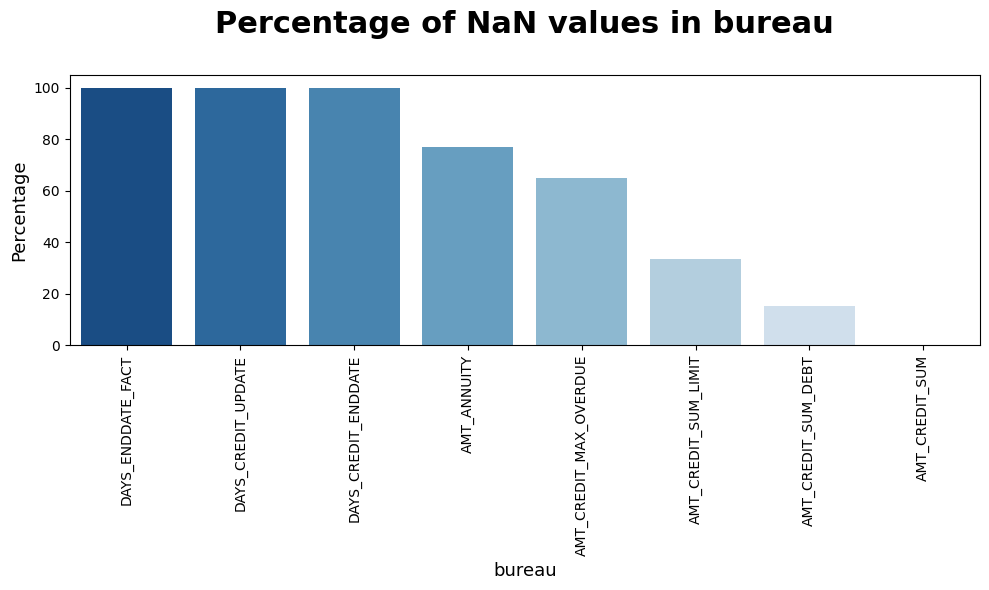

------------------------------------------------------------------------------------------


In [16]:
print('-'*90)
plot_nan_percent(nan_df_bureau, 'bureau', tight_layout = False, figsize = (10,6))
print('-'*90)

##### Observations and Conclusions:

<ol><li>Out of 17 features, there are 8 features which contain NaN values.
    <li>The highest NaN values are observed with the column DAYS_ENDDATE_FACT which has over 99% missing values.</ol>
Suggest: maybe drop feature DAYS_ENDDATE_FACT as it considers much of NaN value

In [17]:
# DROP AMT_ANNUITY columns due to missing values' percentage > 60% and ANNUITY is also a variable repeated in other tables
bureau = bureau.drop(columns=['AMT_ANNUITY'])

# The 3 variables "DAYS_ENDDATE_FACT", "DAYS_CREDIT_UPDATE", "DAYS_CREDIT_ENDDATE" have a null percentage of almost 100% and also before cleaning, looking at the heatmap correlation chart, we can see that the correlation of these variables with each other is very high. So we can drop these three variables
bureau = bureau.drop(columns=["DAYS_ENDDATE_FACT", "DAYS_CREDIT_UPDATE", "DAYS_CREDIT_ENDDATE"])

# 'AMT_CREDIT_SUM' = 'AMT_CREDIT_SUM_DEBT' +'AMT_CREDIT_SUM_LIMIT'
bureau['AMT_CREDIT_SUM_DEBT'] = bureau['AMT_CREDIT_SUM_DEBT'].fillna(0)
bureau['AMT_CREDIT_SUM'] = bureau['AMT_CREDIT_SUM'].fillna(0)

nan_per_after = nan_percent(bureau)
nan_per_after

,Column,Percentage_of_NaN
6,AMT_CREDIT_MAX_OVERDUE,64.732738
10,AMT_CREDIT_SUM_LIMIT,33.417160
2,CREDIT_ACTIVE,0.000000
1,SK_ID_BUREAU,0.000000
0,SK_ID_CURR,0.000000
4,DAYS_CREDIT,0.000000
3,CREDIT_CURRENCY,0.000000
7,CNT_CREDIT_PROLONG,0.000000
5,CREDIT_DAY_OVERDUE,0.000000
8,AMT_CREDIT_SUM,0.000000


Number of columns having NaN values: 2 columns


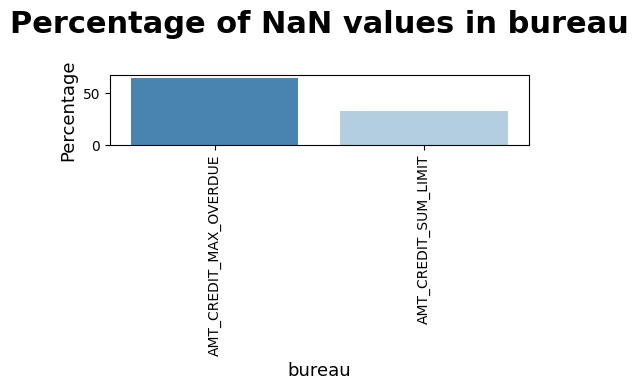

In [18]:
plot_nan_percent(nan_per_after, 'bureau', tight_layout = False, figsize = (5,4))

##### Observations and Conclusions:

<ol><li> After all: Out of 17 features, there are 2 features which contain NaN values.
    <li>The highest NaN values are observed with the column AMT_CREDIT_MAX_OVERDUE which has over 64% missing values.</ol>

# *4.  CATEGORICAL COLUMN*

In [19]:
category_bureau = get_category_column(bureau)
category_bureau

,Feature,Nunique,Percentage of NaN
0,CREDIT_ACTIVE,4,0.0
1,CREDIT_CURRENCY,4,0.0
2,CREDIT_TYPE,15,0.0


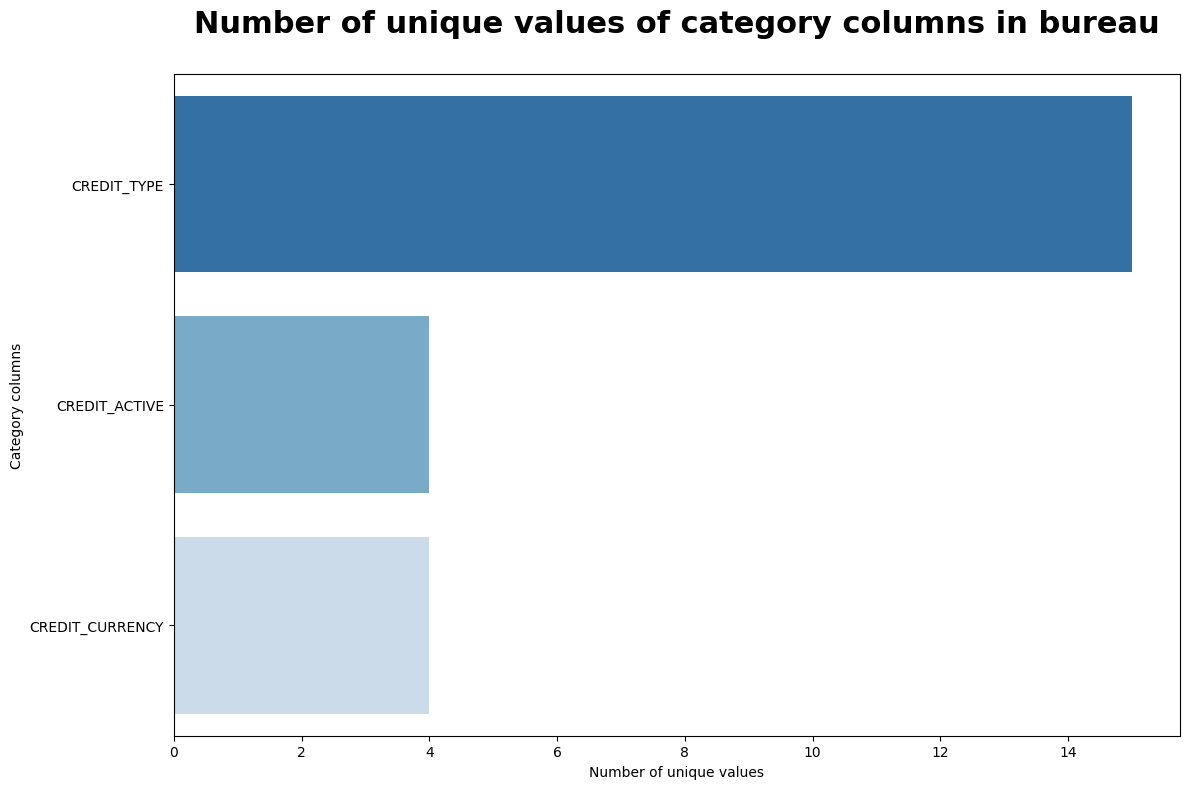

In [20]:
plot_category_column(category_bureau, 'bureau')

##### Observations and Conclusions
Categorical features has 4 or 15 unique values, 4 maybe good for one-hot-encoder as it can well convert, however, 15 unique values should be considering (maybe ordinal/label encoder?)

# *5.EDA*

### 5.1. Merging the TARGETS from application_train to bureau table

In [21]:
print("-"*90)
print("Merging TARGET with bureau Table")
bureau_merged = application_train[['TARGET','SK_ID_CURR']].merge(bureau, on = 'SK_ID_CURR', how = 'left')
print("-"*90)

------------------------------------------------------------------------------------------
Merging TARGET with bureau Table
------------------------------------------------------------------------------------------


### 5.2. Phi-K Matrix

----------------------------------------------------------------------------------------------------


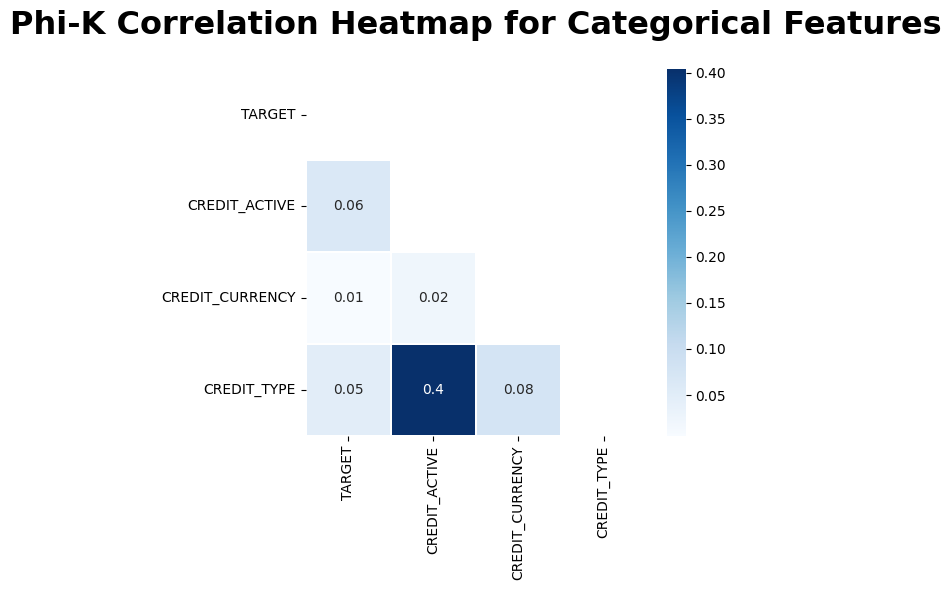

----------------------------------------------------------------------------------------------------
Categories with highest values of Phi-K Correlation value with Target Variable are:


,Column Name,Phik-Correlation
0,CREDIT_ACTIVE,0.064485
2,CREDIT_TYPE,0.048625
1,CREDIT_CURRENCY,0.005718


----------------------------------------------------------------------------------------------------


In [22]:
cols_for_phik = ['TARGET','CREDIT_ACTIVE','CREDIT_CURRENCY','CREDIT_TYPE']
plot_phik_matrix(bureau_merged, cols_for_phik,  figsize = (6,6))

##### Observations and Conclusions:

The above heatmap shows the Phi-K Correlation values between categorical values.
<ol>
<li>From the Phi-K Correlation Coefficient, we see that the variable CREDIT_TYPE shows some association with the variable CREDIT_ACTIVE.</li>
<li>We see that the Categorical Variables don't really have a high association with TARGET variable, especially the CREDIT_CURRENCY feature.</li>
    </ol>

### 5.3. Correlation Matrix of Features

------------------------------------------------------------------------------------------


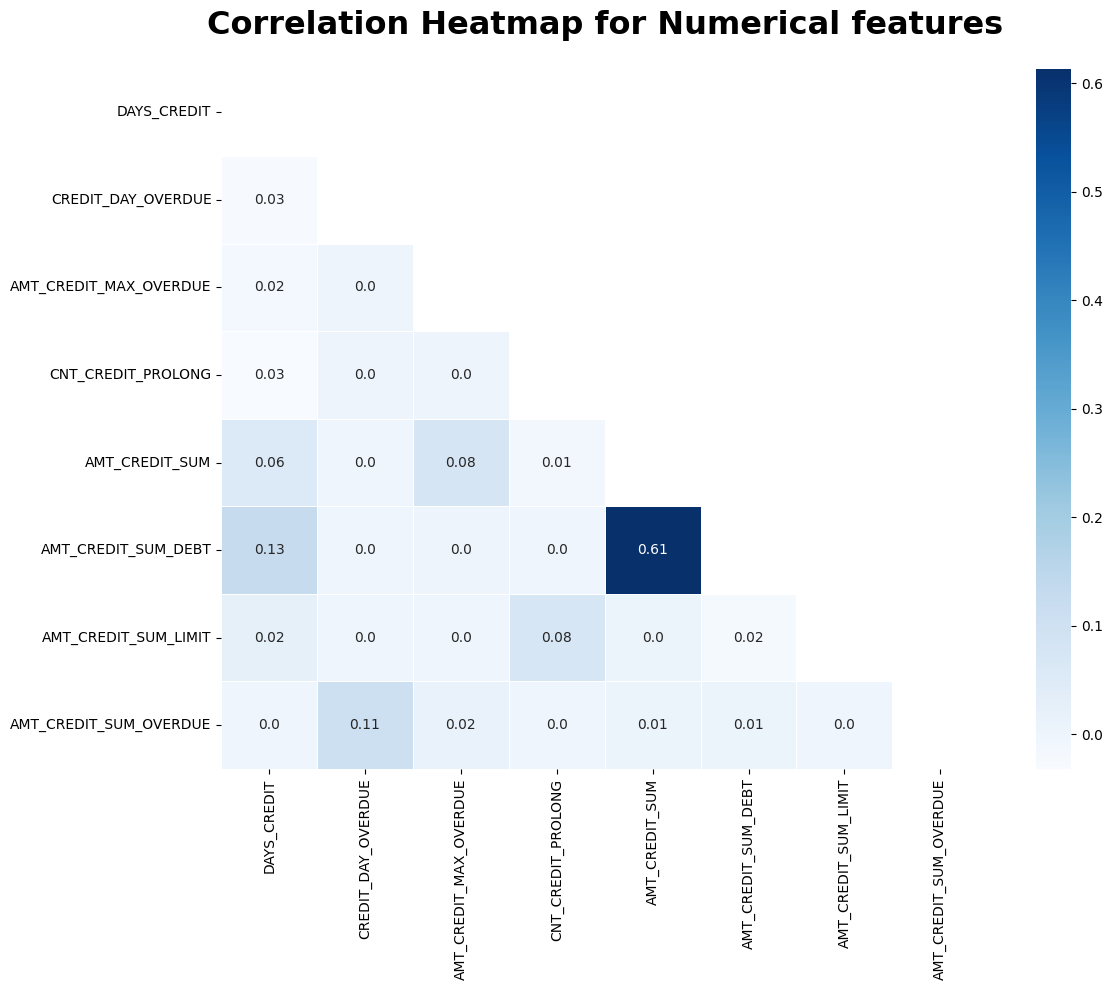

------------------------------------------------------------------------------------------


In [23]:
corr_ma = correlation_matrix(bureau_merged, ['SK_ID_CURR','SK_ID_BUREAU'], cmap = 'Blues', figsize = (12,10))
corr_ma.plot_correlation_matrix()

In [24]:
#Seeing the top columns with highest phik-correlation with the target variable in bureau table
top_corr_target_df = corr_ma.target_top_corr()
print("-" * 100)
print("Columns with highest values of Phik-correlation with Target Variable are:")
display(top_corr_target_df)
print("-"*100)

interval columns not set, guessing: ['TARGET', 'DAYS_CREDIT']
interval columns not set, guessing: ['TARGET', 'CREDIT_DAY_OVERDUE']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT_MAX_OVERDUE']
interval columns not set, guessing: ['TARGET', 'CNT_CREDIT_PROLONG']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT_SUM']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT_SUM_DEBT']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT_SUM_LIMIT']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT_SUM_OVERDUE']
----------------------------------------------------------------------------------------------------
Columns with highest values of Phik-correlation with Target Variable are:


,Column Name,Phik-Correlation
0,DAYS_CREDIT,0.089021
7,AMT_CREDIT_SUM_OVERDUE,0.006411
6,AMT_CREDIT_SUM_LIMIT,0.003793
4,AMT_CREDIT_SUM,0.003130
1,CREDIT_DAY_OVERDUE,0.002550
2,AMT_CREDIT_MAX_OVERDUE,0.002095
3,CNT_CREDIT_PROLONG,0.001855
5,AMT_CREDIT_SUM_DEBT,0.001626


----------------------------------------------------------------------------------------------------


##### Observations and Conclusions:

<ol>
    <li>The heatmap above shows the correlation between each feature in bureau table with the rest of the features.</li>
    <li>It can be observed that most of the heatmap has light colors, which shows little to no correlation.</li>
    <li>However, we can see some dark shades which represent high correlation.</li>
    <li>The high correlation is particularly observed for features:
        <ol><li>DAYS_CREDIT and DAYS_CREDIT_UPDATE</li>
            <li>DAYS_ENDDATE_FACT and DAYS_CREDIT_UPDATE</li>
            <li>AMT_CREDIT_SUM and AMT_CREDIT_SUM_DEBT</li>
            <li>DAYS_ENDDATE_FACT and DAYS_CREDIT</li></ol></li>
    <li>We can also see that the features don't particularly show good/high correlation with Target as such, except for DAYS_CREDIT feature. This implies that there isn't a direct linear relation between Target and the features.</li></ol>

### 5.4. Plotting Categorical Variables

Plotting some of the Categorical Variables of the table bureau, and see their impact on the Target Variable.

<b><u>+ Distribution of Categorical Variable CREDIT_ACTIVE</u></b>

----------------------------------------------------------------------------------------------------
The unique categories of 'CREDIT_ACTIVE' are:
['Closed' 'Active' nan 'Sold' 'Bad debt']
----------------------------------------------------------------------------------------------------
Counts of each category are:
CREDIT_ACTIVE
Closed      735070
Active      433798
Sold          4494
Bad debt        16
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Total Number of unique categories of CREDIT_ACTIVE = 5


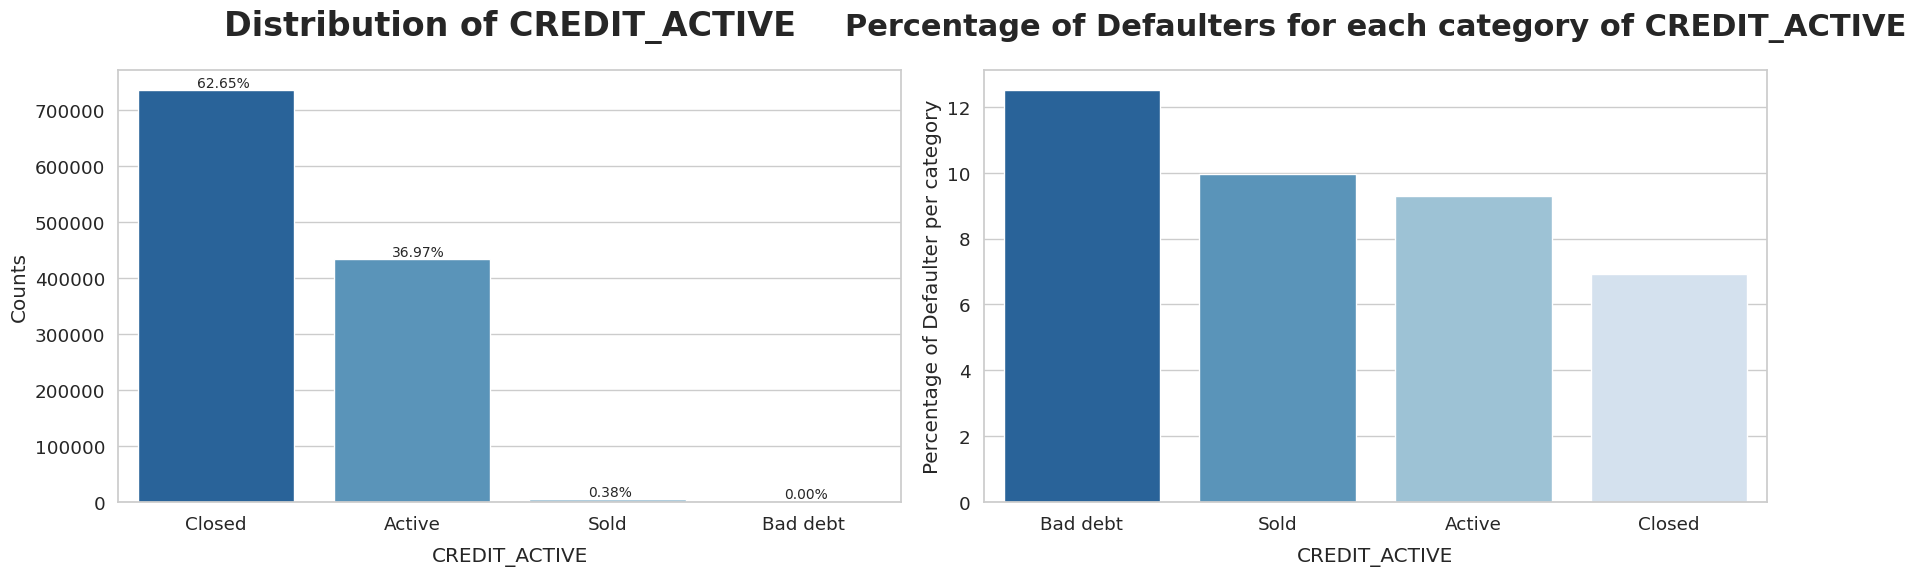

In [25]:
print_unique_categories(bureau_merged, 'CREDIT_ACTIVE', show_counts = True)

# plotting the Bar Plot for the Column
plot_categorical_variables_bar(bureau_merged, column_name = 'CREDIT_ACTIVE', horizontal_adjust = 0.3, fontsize_percent = 'x-small')

### 5.5. Plotting Continuous Variables

<u><b> + Distribution of Continuous Variable with DAYS_ Features</b></u>

<u><b> +++ DAYS_CREDIT</b></u>

This column describes about the number of days before current application when the client applied for Credit Bureau Credit. Converting these days to years.

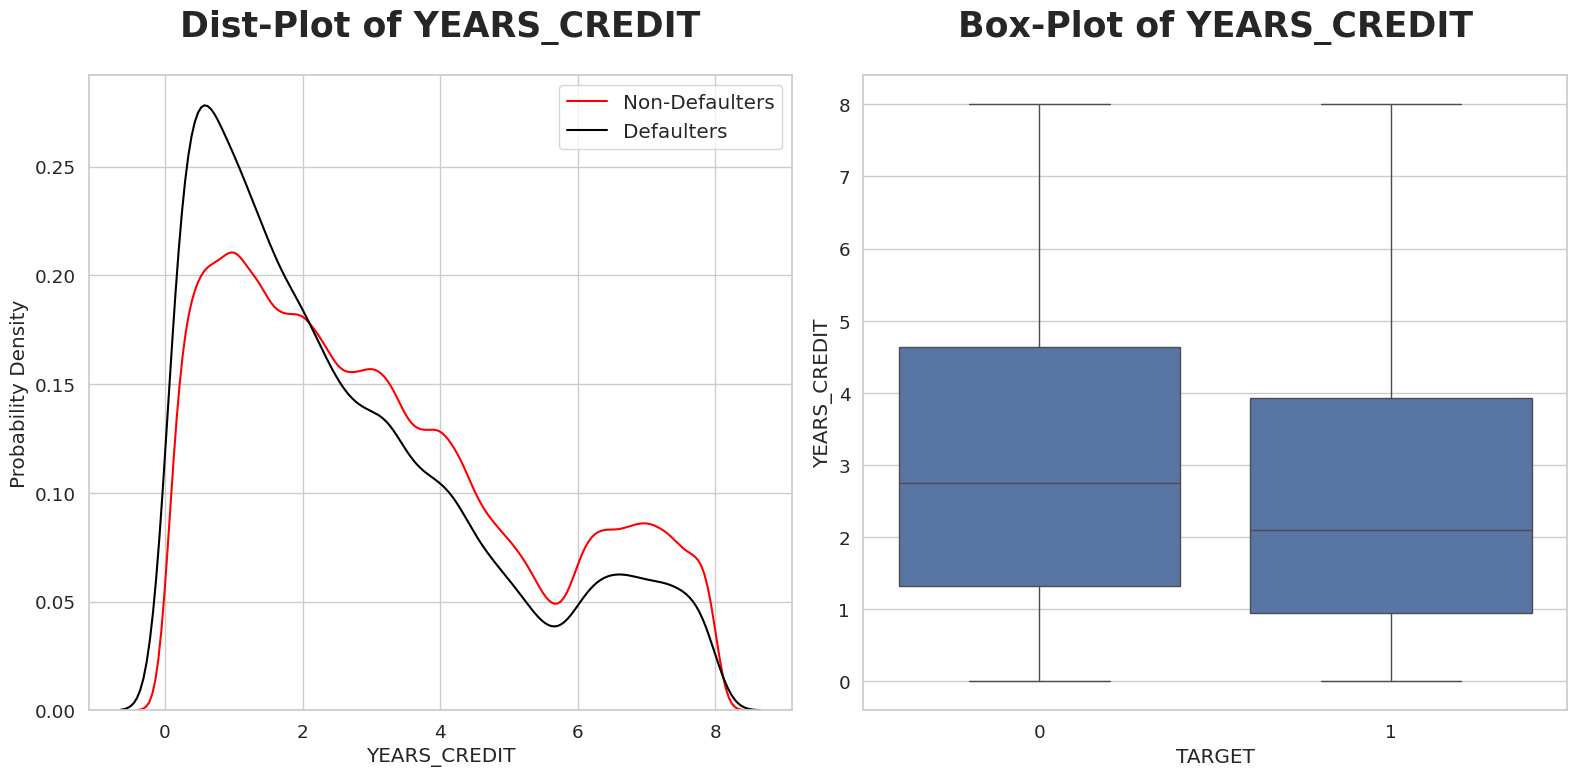

0          7.084932
1          4.482192
2          2.123288
3          1.660274
4               NaN
             ...   
1208573    0.994521
1208574    1.235616
1208575    4.142466
1208576    6.402740
1208577    6.402740
Name: YEARS_CREDIT, Length: 1208578, dtype: float64

In [26]:
bureau_merged['YEARS_CREDIT'] = bureau_merged['DAYS_CREDIT'] / - 365
plot_continuous_variables(bureau_merged, 'YEARS_CREDIT', plots = ['distplot', 'box'], figsize = (16,8))
year_cr = bureau_merged.pop('YEARS_CREDIT')
year_cr

##### Observations and Conclusions:

From the above plots, we see that:
<ol><li>From the PDF, we see that the Defaulters tend to have higher peaks compared to Non-Defaulters when the number of years are smaller... This indicates that the applicants who had applied for loans from Credit Bureau recently showed more defaulting tendency than those who had applied long ago. The PDF of Defaulters is also a bit towards left as compared to Non-Defaulters.</li>
    <li>For the box-plot as well, we see that Defaulters usually had less YEARS_CREDIT when compared to Non-Defaulters.

<u><b> + Distribution of Continuous Variable with: Number of past loans per customer</b></u>

In [27]:
num_past_loan_target = bureau_merged[['SK_ID_CURR', 'DAYS_CREDIT', 'TARGET']].groupby(['SK_ID_CURR', 'TARGET'])['DAYS_CREDIT'].count().reset_index()
num_past_loan_target.columns = ['SK_ID_CURR','TARGET','num_of_past_loans']
num_past_loan_target

,SK_ID_CURR,TARGET,num_of_past_loans
0,0,0,1
1,1,1,1
2,2,0,6
3,3,0,7
4,4,0,6
...,...,...,...
246004,307505,0,2
246005,307506,0,4
246006,307507,0,0
246007,307509,0,2


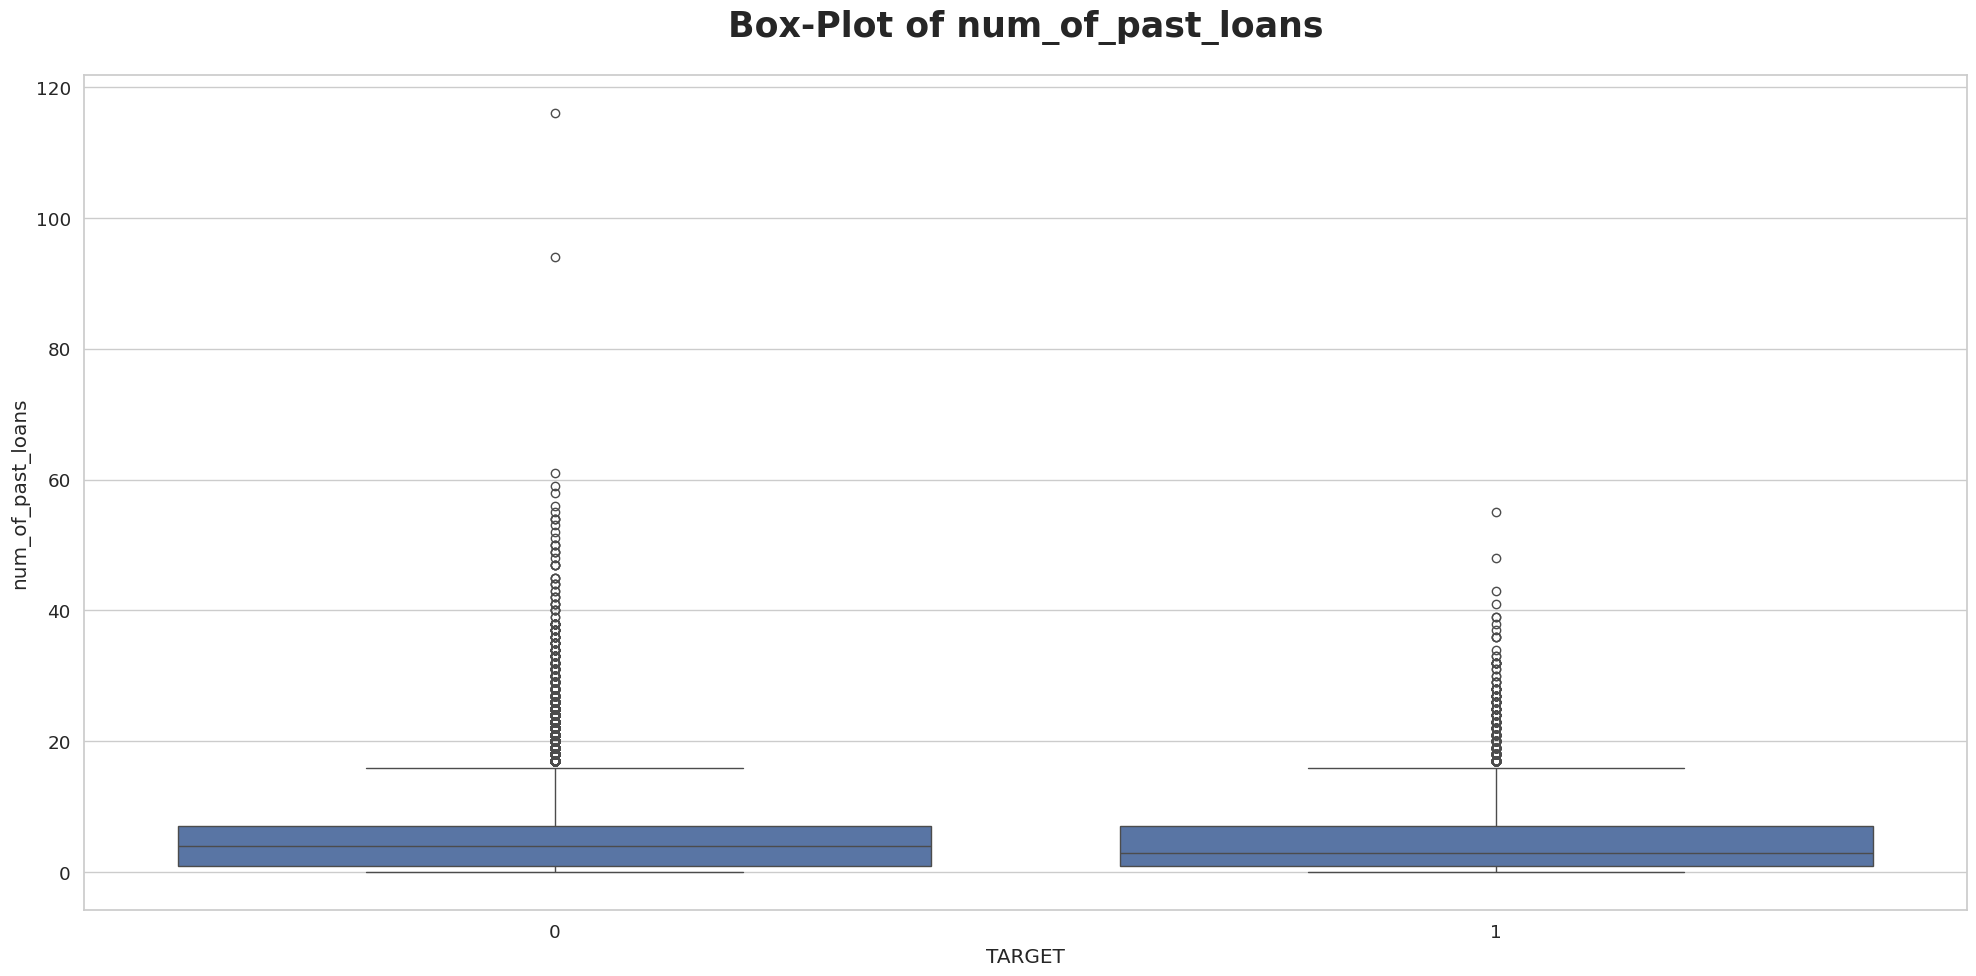

In [28]:
plot_continuous_variables(num_past_loan_target,'num_of_past_loans', plots = ['box'],figsize=(20,10))

##### Observations and Conclusions:

The distribution is quite similar, it seems that this variable does not have too much influence on the TARGET variable

<u><b> + Distribution of Continuous Variable with: Number of types of past loans per customer</b></u>

In [29]:
num_of_type_target = bureau_merged[['SK_ID_CURR','CREDIT_TYPE','TARGET']].groupby(['SK_ID_CURR','TARGET']).nunique().reset_index()
num_of_type_target.columns = ['SK_ID_CURR','TARGET','num_of_credit_type']
num_of_type_target

,SK_ID_CURR,TARGET,num_of_credit_type
0,0,0,1
1,1,1,1
2,2,0,1
3,3,0,2
4,4,0,2
...,...,...,...
246004,307505,0,2
246005,307506,0,1
246006,307507,0,0
246007,307509,0,2


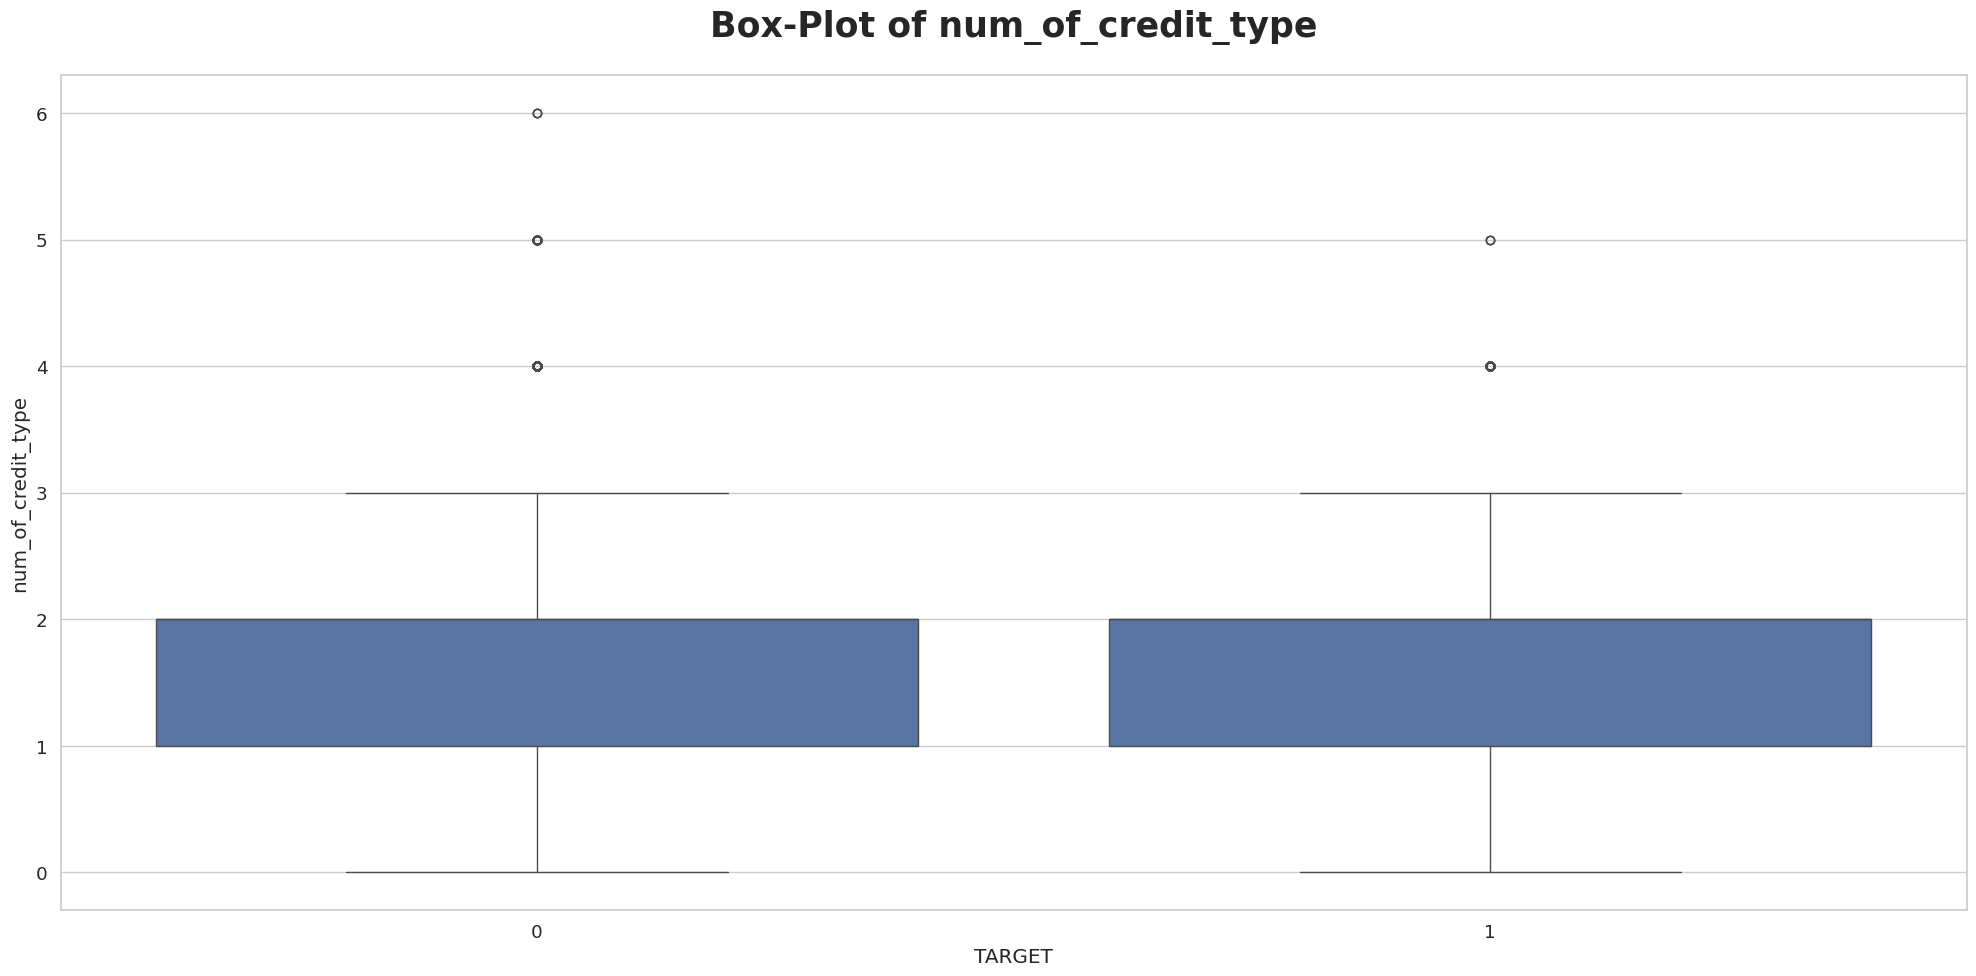

In [30]:
plot_continuous_variables(num_of_type_target,'num_of_credit_type', plots = ['box'],figsize=(20,10))

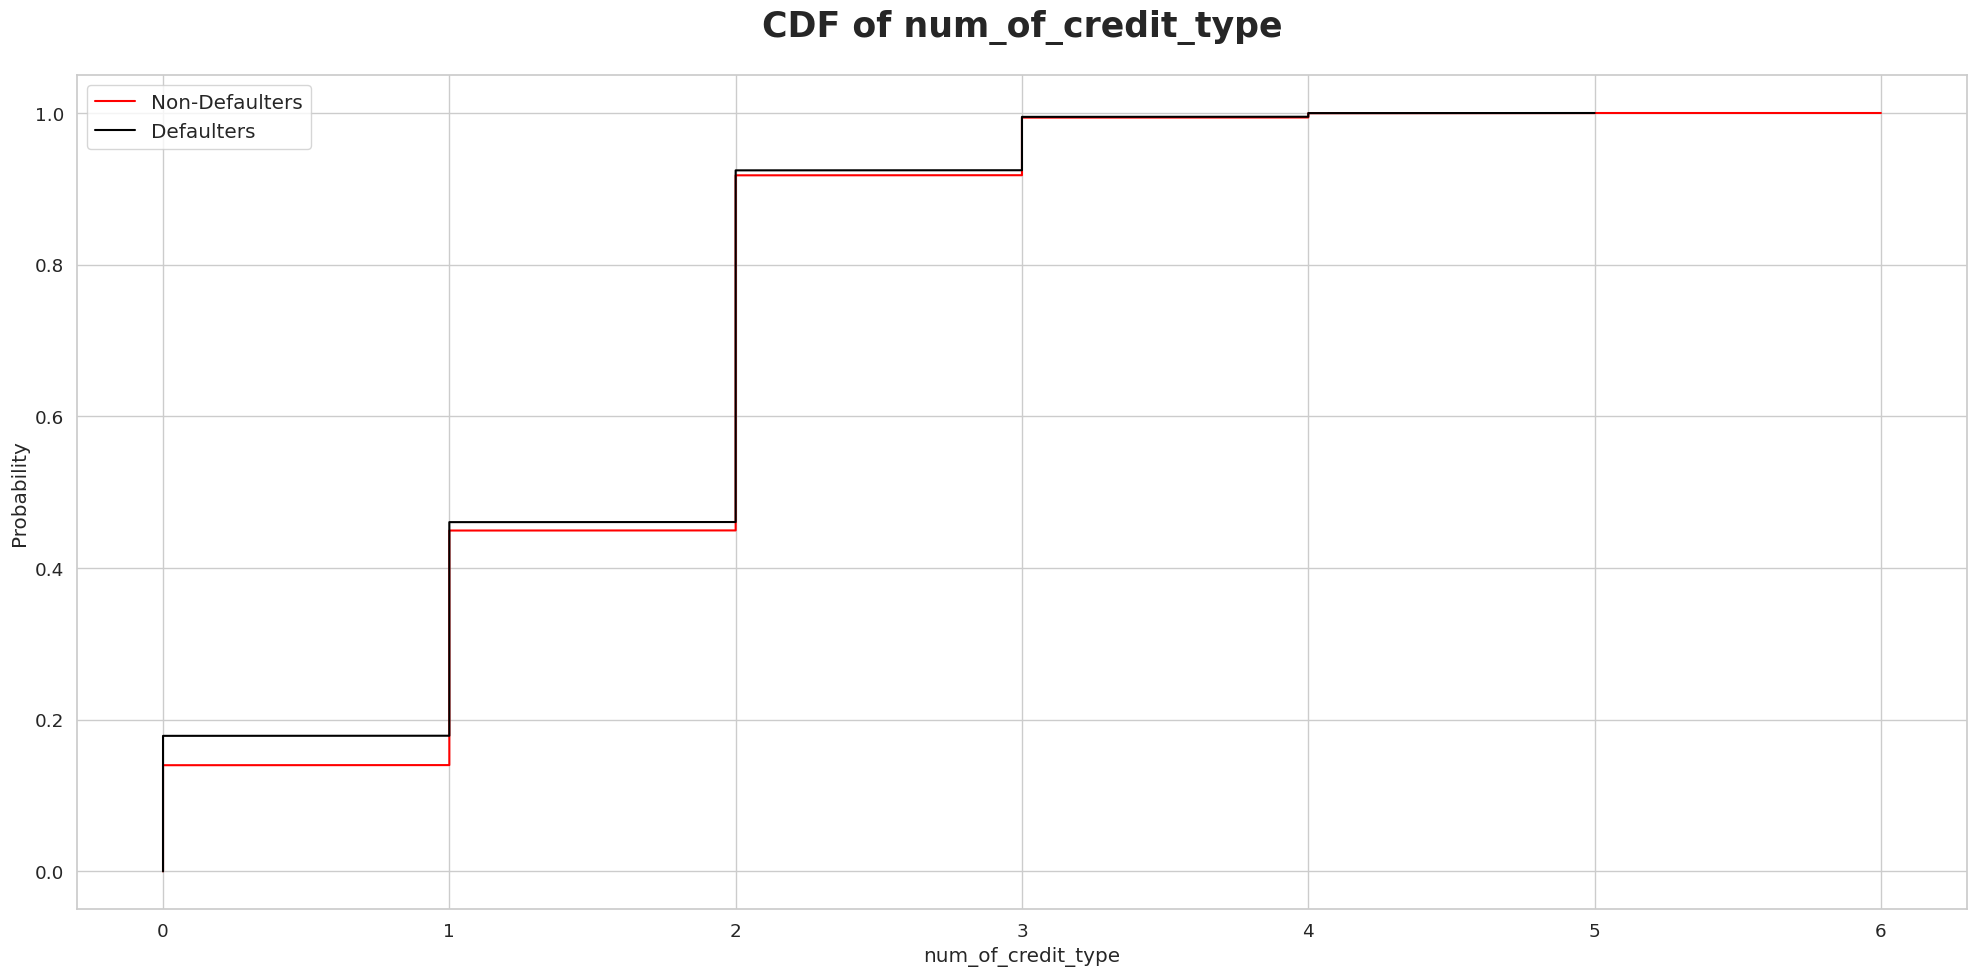

In [31]:
plot_continuous_variables(num_of_type_target,'num_of_credit_type', plots = ['CDF'],figsize=(20,10))

#### Observations and Conclusions:

The distribution is quite similar, it seems that the number of credit type factor does not affect whether customers have difficulty repaying debt or not.

In [32]:
num_of_type = bureau[['SK_ID_CURR','CREDIT_TYPE']].groupby(['SK_ID_CURR']).nunique().reset_index()
num_of_type.columns = ['SK_ID_CURR','CREDIT_TYPE_COUNT']
num_of_type

,SK_ID_CURR,CREDIT_TYPE_COUNT
0,0,1
1,1,1
2,2,1
3,3,2
4,4,2
...,...,...
263486,307504,1
263487,307505,2
263488,307506,1
263489,307508,3


<u><b> + Distribution of Continuous Variable with: The percentage of active loans per customer</b></u>

In [33]:
bureau_merged['CREDIT_ACTIVE_BINARY'] = bureau_merged['CREDIT_ACTIVE']

def check(status):
    if status == 'Closed':
        result = 0
    else:
        result = 1 
    return result

bureau_merged['CREDIT_ACTIVE_BINARY'] = bureau_merged.apply(lambda x: check(x.CREDIT_ACTIVE), axis = 1)

atv_loans_target = bureau_merged.groupby(by = ['SK_ID_CURR', 'TARGET'])['CREDIT_ACTIVE_BINARY'].mean().reset_index().rename(index=str, columns={'CREDIT_ACTIVE_BINARY': 'ACTIVE_LOANS_PERCENTAGE'})
atv_loans_target['ACTIVE_LOANS_PERCENTAGE'] = atv_loans_target['ACTIVE_LOANS_PERCENTAGE'] * 100
atv_loans_target

,SK_ID_CURR,TARGET,ACTIVE_LOANS_PERCENTAGE
0,0,0,100.000000
1,1,1,100.000000
2,2,0,33.333333
3,3,0,42.857143
4,4,0,50.000000
...,...,...,...
246004,307505,0,100.000000
246005,307506,0,0.000000
246006,307507,0,100.000000
246007,307509,0,50.000000


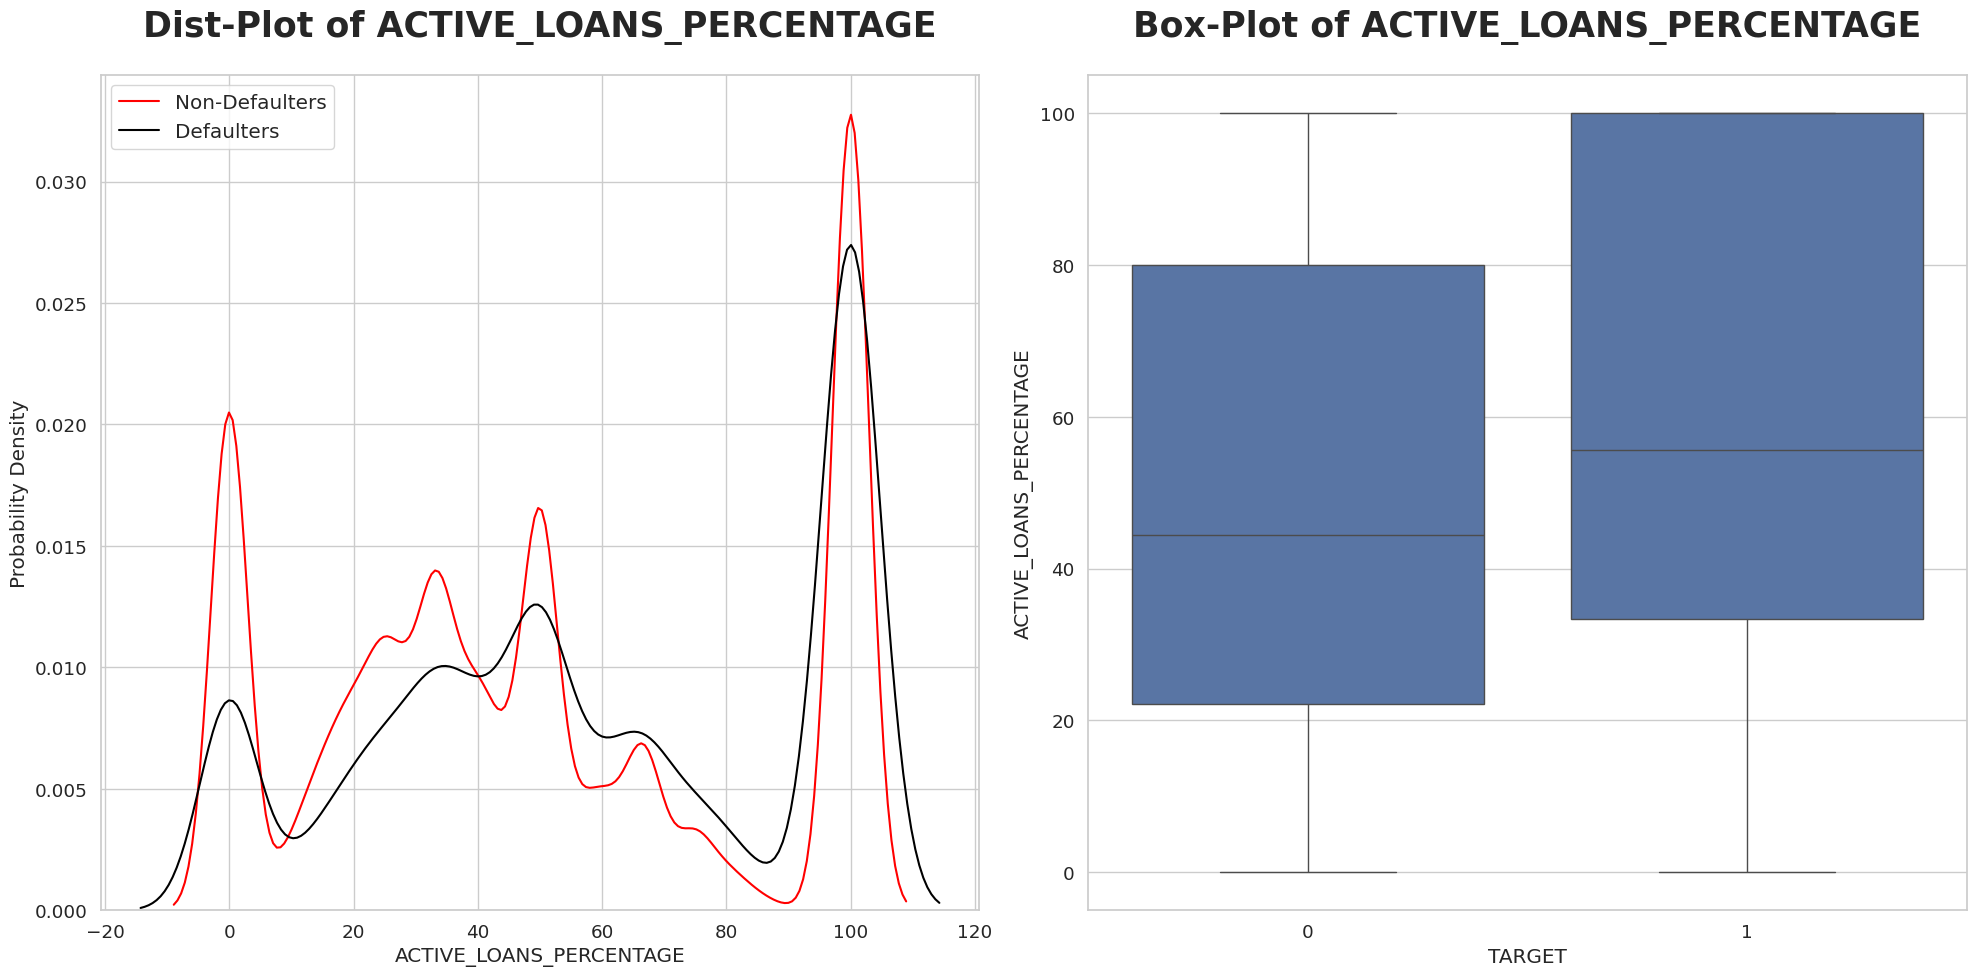

In [34]:
plot_continuous_variables(atv_loans_target,"ACTIVE_LOANS_PERCENTAGE", plots = ['distplot','box'],figsize=(20,10))

##### Observations and Conclusions:

The defaulters often have a higher percentage of their active debt than non-defaulters

In [35]:
bureau['CREDIT_ACTIVE_BINARY'] = bureau['CREDIT_ACTIVE']

def check(status):
    if status == 'Closed':
        result = 0
    else:
        result = 1 
    return result

bureau['CREDIT_ACTIVE_BINARY'] = bureau.apply(lambda x: check(x.CREDIT_ACTIVE), axis = 1)

atv_loans = bureau.groupby(by = ['SK_ID_CURR'])['CREDIT_ACTIVE_BINARY'].mean().reset_index().rename(index=str, columns={'CREDIT_ACTIVE_BINARY': 'ACTIVE_LOANS_PERCENTAGE'})
atv_loans['ACTIVE_LOANS_PERCENTAGE'] = atv_loans['ACTIVE_LOANS_PERCENTAGE'] * 100
bureau = bureau.drop(columns=['CREDIT_ACTIVE_BINARY'])
atv_loans


,SK_ID_CURR,ACTIVE_LOANS_PERCENTAGE
0,0,100.000000
1,1,100.000000
2,2,33.333333
3,3,42.857143
4,4,50.000000
...,...,...
263486,307504,25.000000
263487,307505,100.000000
263488,307506,0.000000
263489,307508,57.142857


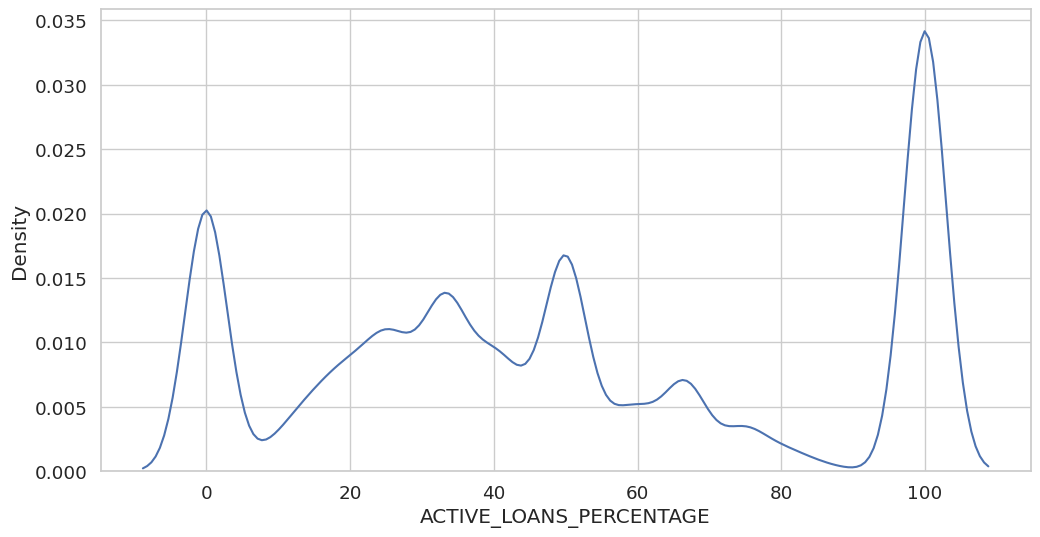

In [36]:
plt.figure(figsize= (12,6))
sns.distplot(atv_loans_target["ACTIVE_LOANS_PERCENTAGE"], bins=10,hist = False)
plt.show()

In [37]:
bureau_with_sum_debt_pos_sign = bureau_merged[bureau_merged['AMT_CREDIT_SUM_DEBT']>0]

#chỉ consider những khoản debt đã đc trả hoàn toàn.
grp1 = bureau_with_sum_debt_pos_sign[['SK_ID_CURR', 'AMT_CREDIT_SUM_DEBT']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM_DEBT': 'TOTAL_CUSTOMER_DEBT'})
grp2 = bureau_merged[['SK_ID_CURR', 'AMT_CREDIT_SUM']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM': 'TOTAL_CUSTOMER_CREDIT'})

bureau_merged = bureau_merged.merge(grp1, on = ['SK_ID_CURR'], how = 'left')
bureau_merged = bureau_merged.merge(grp2, on = ['SK_ID_CURR'], how = 'left')
del grp1, grp2


bureau_merged['DEBT_CREDIT_RATIO'] = (bureau_merged['TOTAL_CUSTOMER_DEBT']/bureau_merged['TOTAL_CUSTOMER_CREDIT'])*100
bureau_merged['DEBT_CREDIT_RATIO'] = bureau_merged['DEBT_CREDIT_RATIO'].replace([np.inf, -np.inf], np.nan)

del bureau_merged['TOTAL_CUSTOMER_DEBT'], bureau_merged['TOTAL_CUSTOMER_CREDIT']

debt_credit_target = bureau_merged.groupby(by = ['SK_ID_CURR','TARGET'])['DEBT_CREDIT_RATIO'].mean().reset_index().rename(index=str)
debt_credit_target

,SK_ID_CURR,TARGET,DEBT_CREDIT_RATIO
0,0,0,90.706731
1,1,1,NaN
2,2,0,37.908544
3,3,0,41.072109
4,4,0,44.445915
...,...,...,...
246004,307505,0,NaN
246005,307506,0,NaN
246006,307507,0,NaN
246007,307509,0,8.857143


In [38]:
debt_credit_target = debt_credit_target[debt_credit_target['DEBT_CREDIT_RATIO'] <= 100]

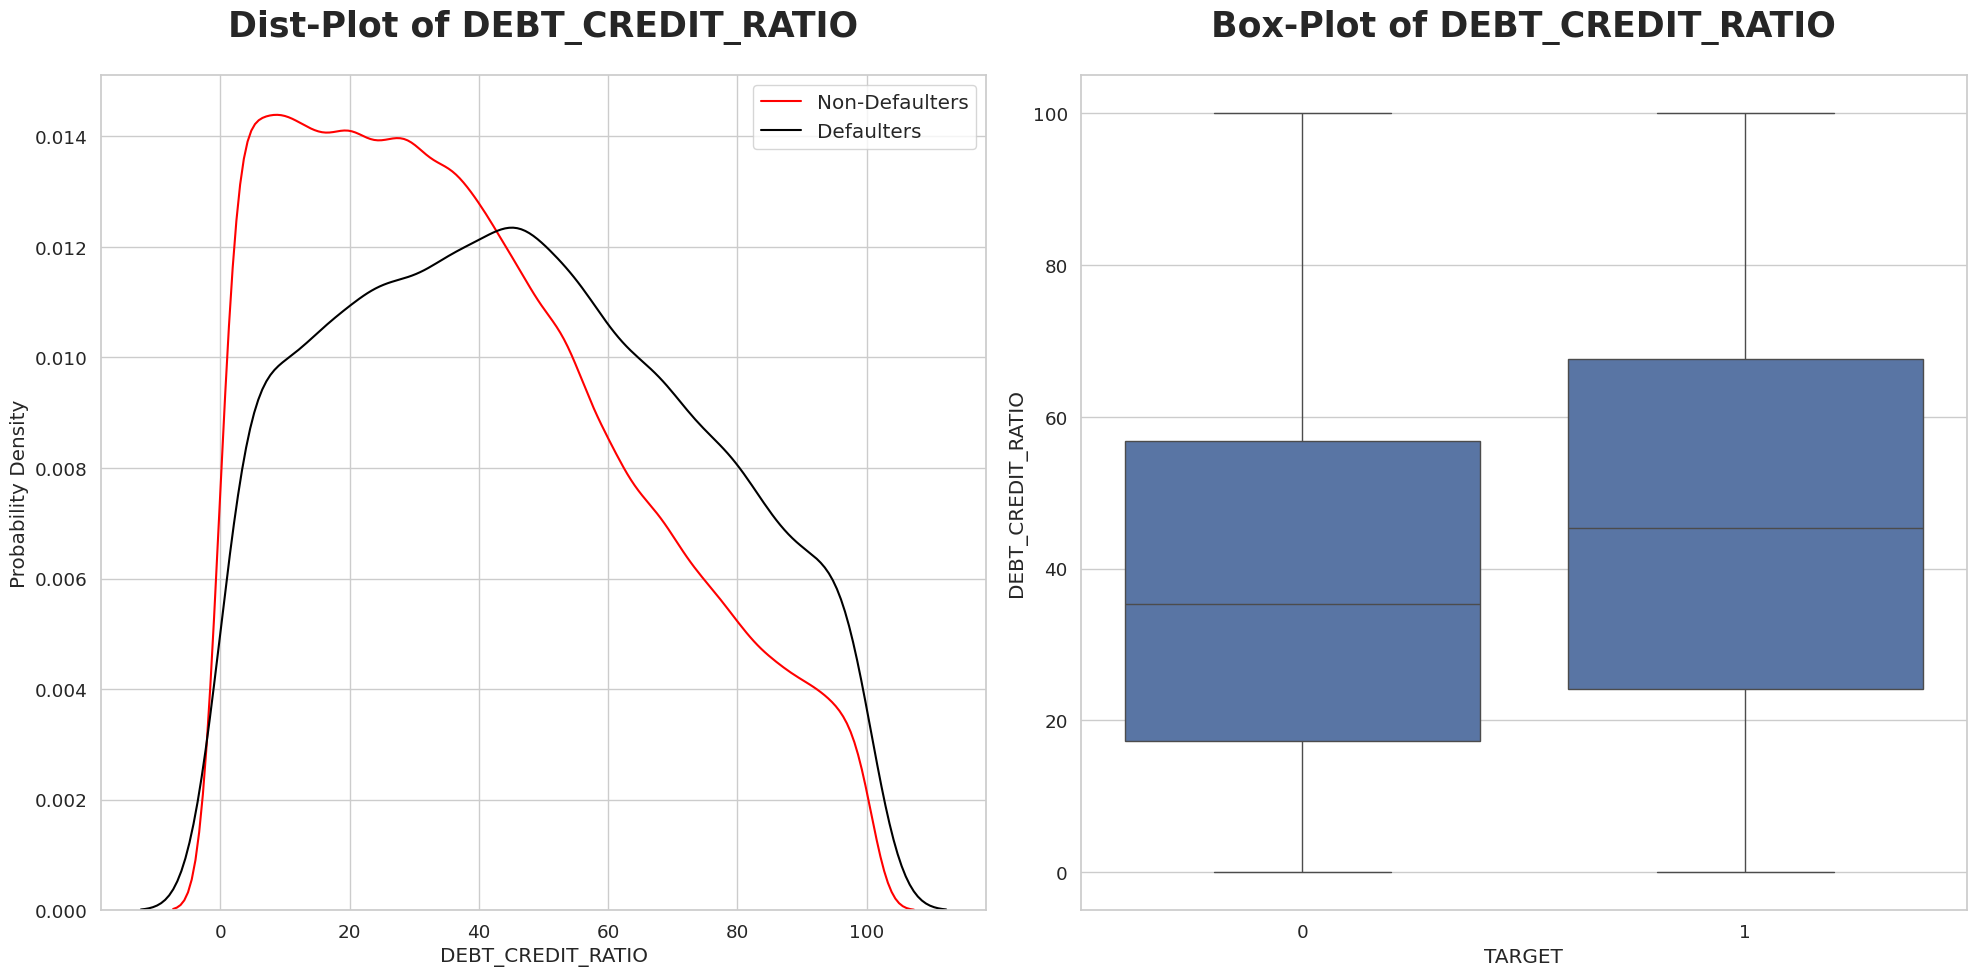

In [39]:
plot_continuous_variables(debt_credit_target,"DEBT_CREDIT_RATIO", plots = ['distplot', 'box'],figsize=(20,10))

# *6.OBSERVATION AND CONCLUSION*

- The imbalance ratio is computed as the number of instances in the majority class divided by the number of instances in the minority class. \
It's important to note that an imbalance ratio of 0.0000 doesn't necessarily mean perfect balance. It could be an indication that the majority class heavily outweighs the minority class.\
In contrast, None indicates that the imbalance ratio may not be applicable or computable for the given column, perhaps due to the absence of a binary classification scenario.